In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

Load audio file in the player

In [2]:
audio_path = "./audio/piano_c.wav"

In [3]:
ipd.Audio(audio_path)

Load audio file

In [4]:
signal, sr = librosa.load(audio_path)

In [5]:
signal

array([-3.4608310e-01, -5.7889587e-01, -5.7302415e-01, ...,
        3.5212681e-06, -5.3511012e-06, -6.6172838e-06],
      shape=(33968,), dtype=float32)

In [6]:
sr

22050

plot waveform

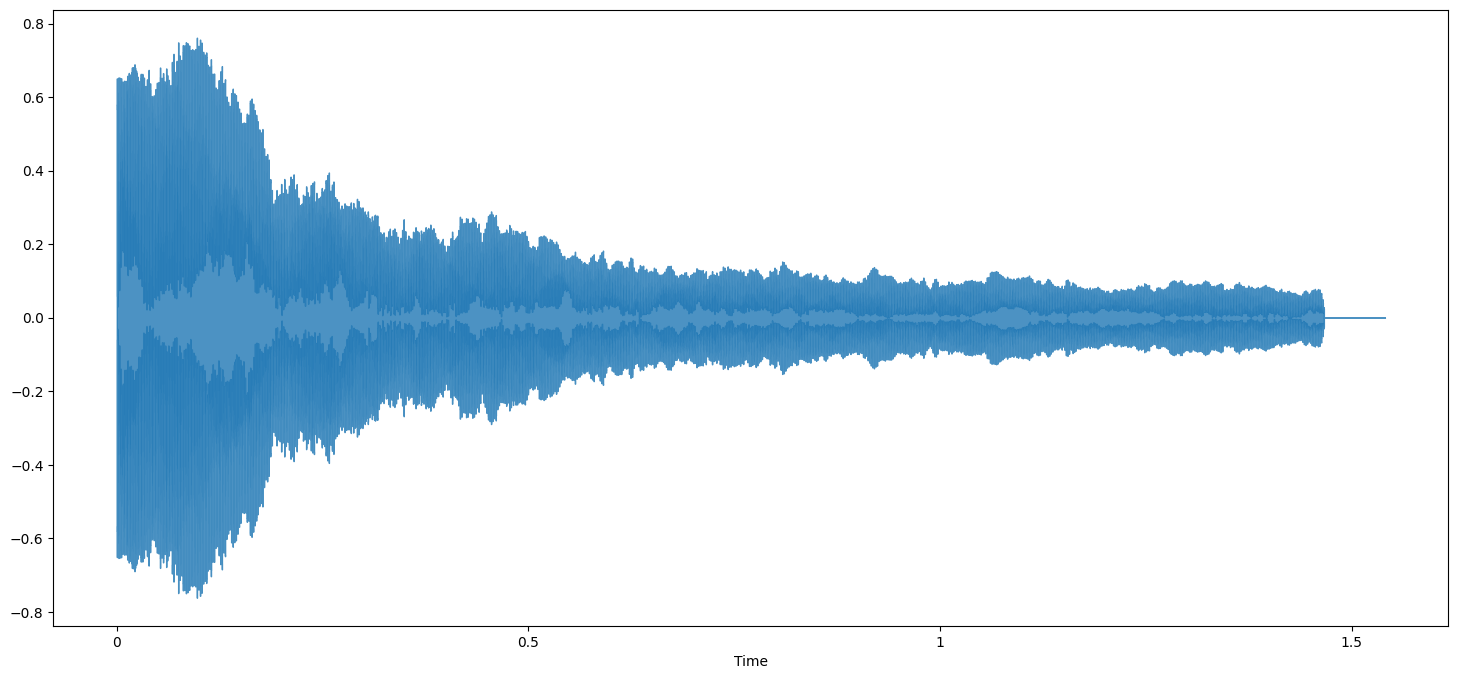

In [7]:
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.8)
plt.show()

Derive spectrum using Fourier Transform

In [8]:
ft = sp.fft.fft(signal)

ft

array([-42.619125 -0.j       , -34.297115 +6.5602145j,
       -29.963587 +7.42504j  , ..., -27.41175 -12.946168j ,
       -29.963587 -7.42504j  , -34.297115 -6.5602145j],
      shape=(33968,), dtype=complex64)

In [9]:
magnitude = np.absolute(ft)

magnitude

array([42.619125, 34.918888, 30.869852, ..., 30.315134, 30.869852,
       34.918888], shape=(33968,), dtype=float32)

In [10]:
frequency = np.linspace(0, sr, len(magnitude))

frequency

array([0.00000000e+00, 6.49159478e-01, 1.29831896e+00, ...,
       2.20487017e+04, 2.20493508e+04, 2.20500000e+04], shape=(33968,))

Plot spectrum

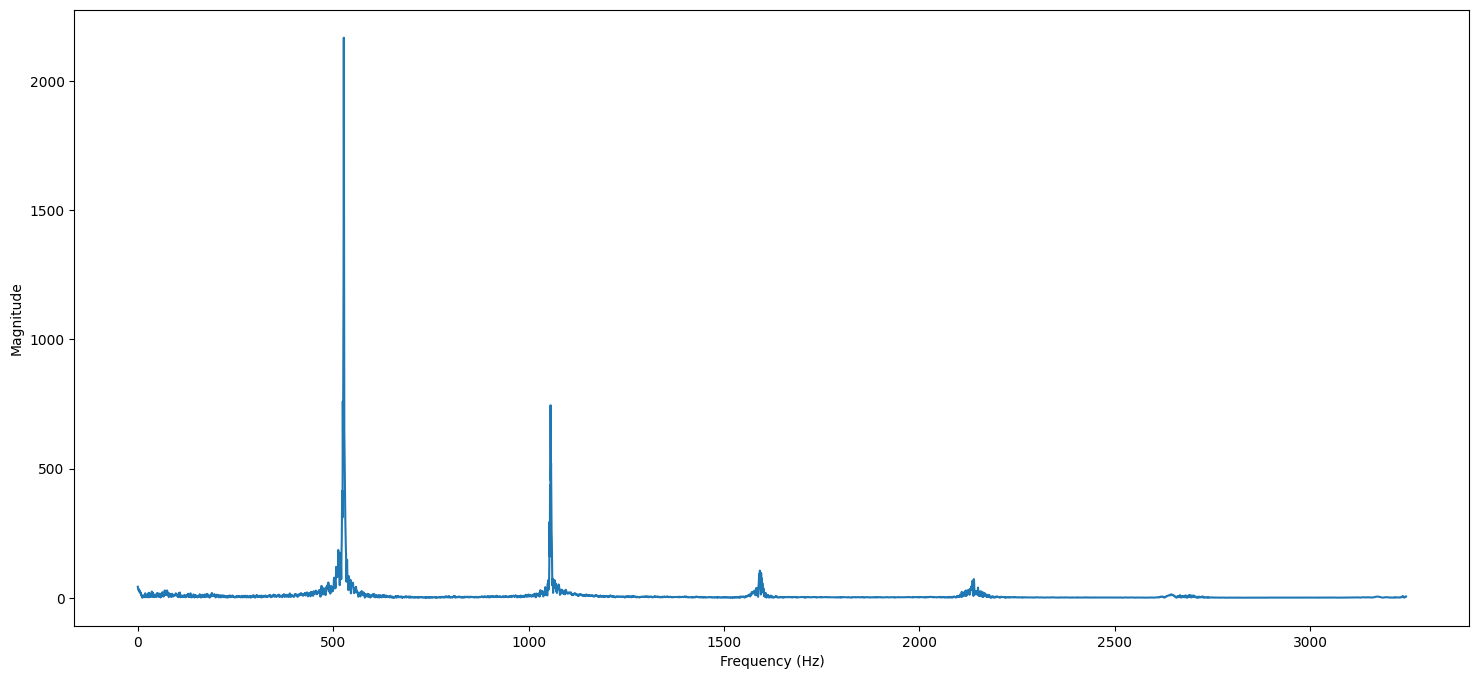

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(
    frequency[:5000],
    magnitude[:5000]
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [12]:
len(signal)

33968

In [13]:
sr

22050

In [14]:
d = 1/sr

d

4.5351473922902495e-05

In [15]:
d_523 = 1 / 523

d_523

0.0019120458891013384

In [16]:
d_400_samples = 400 * d

d_400_samples

0.018140589569160998

Zooom in to the waveform

In [17]:
samples = range(len(signal))

samples

range(0, 33968)

In [18]:
t = librosa.samples_to_time(samples, sr=sr)

t

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       1.54036281e+00, 1.54040816e+00, 1.54045351e+00], shape=(33968,))

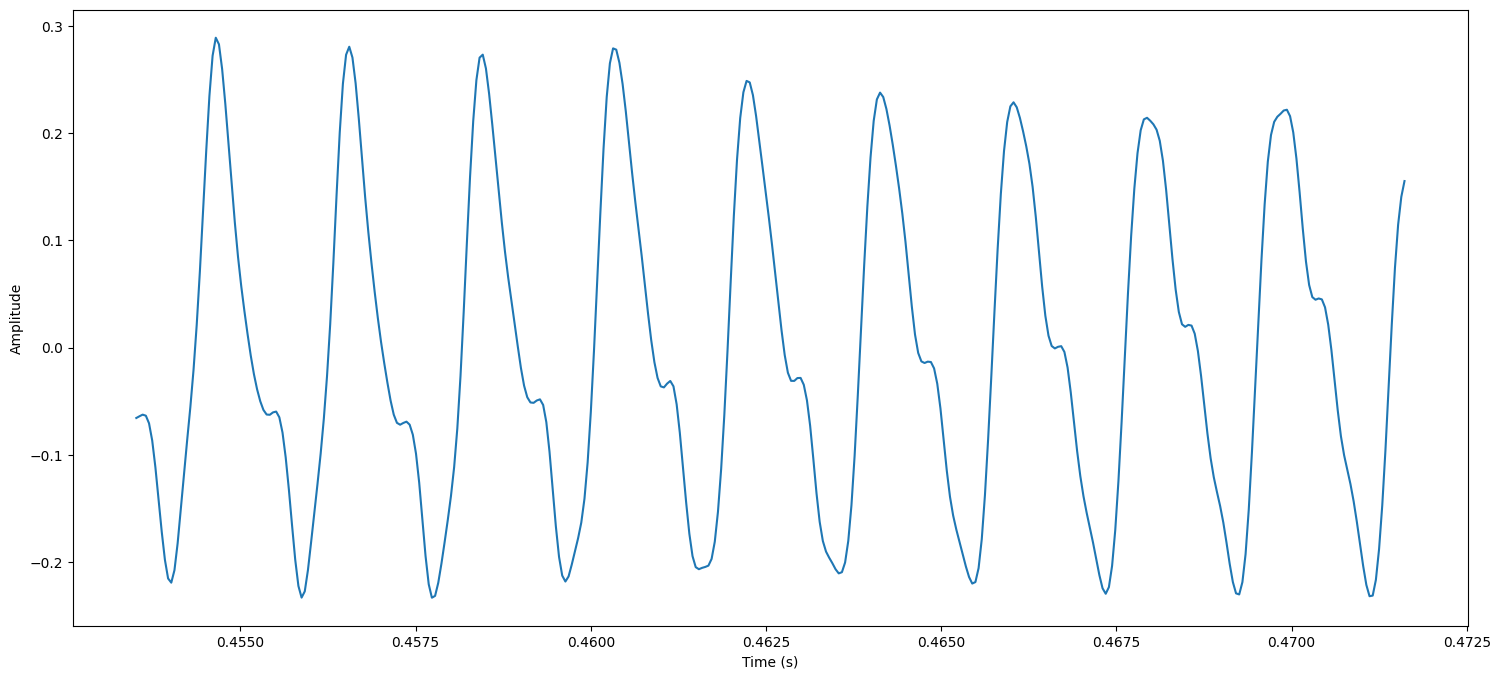

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(
    t[10000:10400],
    signal[10000:10400]
)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Create a sinusoid

In [20]:
f = 523
phase = 0
phase2 = 0.2

In [21]:
sin = 0.5 * np.sin(2 * np.pi * (f * t - phase))

sin

array([ 0.        ,  0.07423935,  0.14683291, ..., -0.31810782,
       -0.37185828, -0.4173651 ], shape=(33968,))

In [22]:
sin2 = 0.5 * np.sin(2 * np.pi * (f * t - phase2))

sin2

array([-0.47552826, -0.44731609, -0.40918747, ...,  0.2685747 ,
        0.20297777,  0.13288108], shape=(33968,))

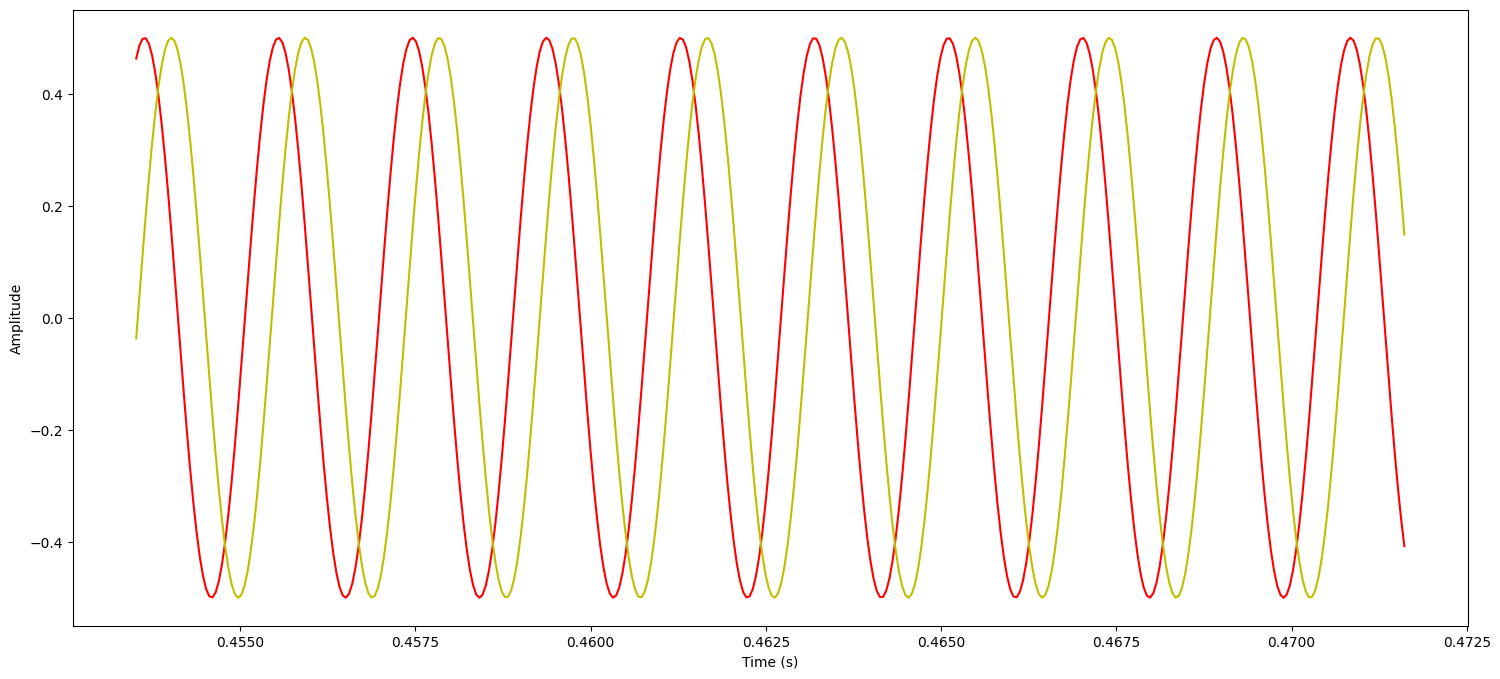

In [23]:
plt.figure(figsize=(18, 8))
plt.plot(
    t[10000:10400],
    sin[10000:10400],
    color="r"
)
plt.plot(
    t[10000:10400],
    sin2[10000:10400],
    color="y"
)


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Compare signal and sinusoids

In [24]:
f = 523
phase = 0.55

In [25]:
sin = 0.1 * np.sin(2 * np.pi * (f * t - phase))

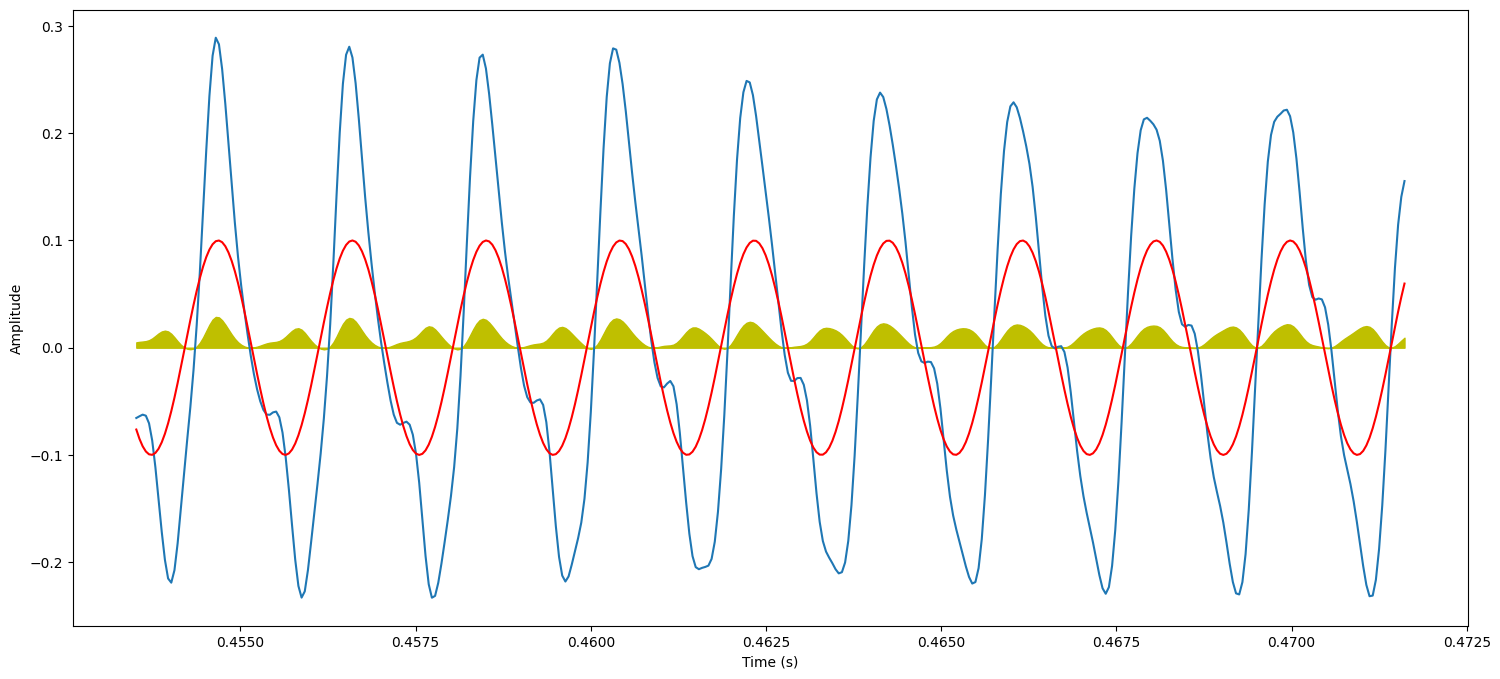

In [26]:
plt.figure(figsize=(18, 8))
plt.plot(
    t[10000:10400],
    signal[10000:10400]
)
plt.plot(
    t[10000:10400],
    sin[10000:10400],
    color="r"
)

plt.fill_between(
    t[10000:10400],
    sin[10000:10400] * signal[10000:10400],
    color="y"
)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

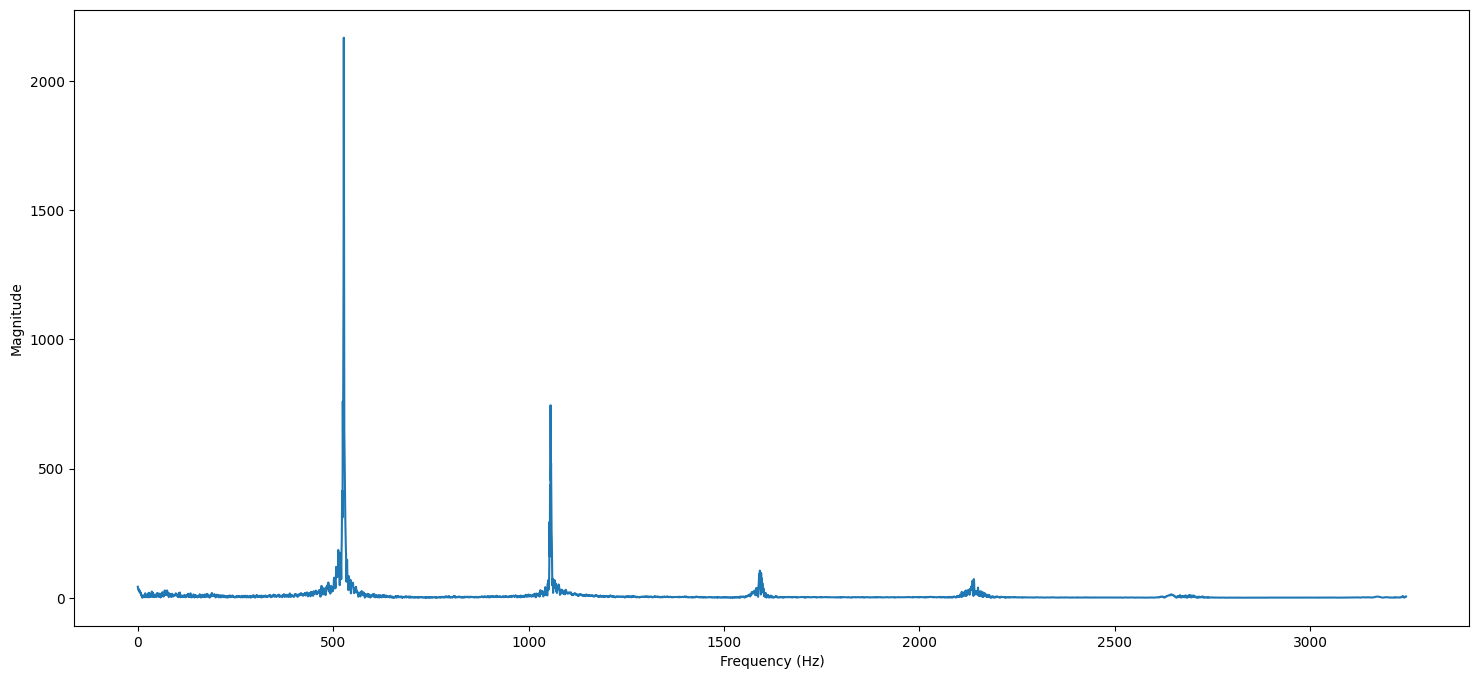

In [27]:
plt.figure(figsize=(18, 8))
plt.plot(
    frequency[:5000],
    magnitude[:5000]
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

Superimposing pure tones

In [28]:
f = 1
t = np.linspace(0, 10, 10000)

In [29]:
sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

In [30]:
sin

array([ 0.00000000e+00,  6.28377233e-03,  1.25672965e-02, ...,
       -1.25672965e-02, -6.28377233e-03, -2.44929360e-15], shape=(10000,))

In [31]:
sin2

array([ 0.00000000e+00,  1.25672965e-02,  2.51326082e-02, ...,
       -2.51326082e-02, -1.25672965e-02, -4.89858720e-15], shape=(10000,))

In [32]:
sin3

array([ 0.00000000e+00,  1.88503245e-02,  3.76939503e-02, ...,
       -3.76939503e-02, -1.88503245e-02, -2.15587355e-14], shape=(10000,))

In [33]:
sum_signal = sin + sin2 + sin3

sum_signal

array([ 0.00000000e+00,  3.77013934e-02,  7.53938550e-02, ...,
       -7.53938550e-02, -3.77013934e-02, -2.89066163e-14], shape=(10000,))

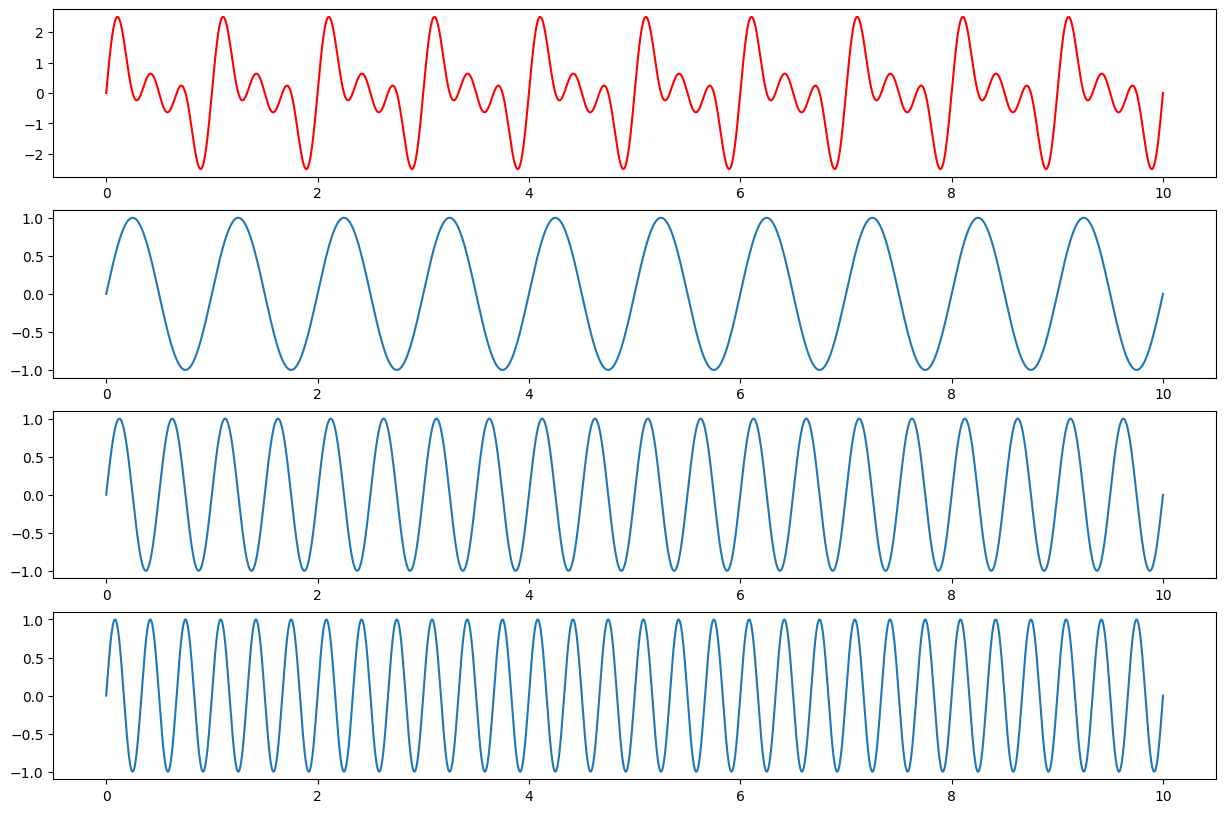

In [35]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()